# Image classifier using Sequential API: tf.keras

- Based on exercises from  “ Chapter 10 : Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition, by Aurélien Géron (O’Reilly). Copyright 2019 Kiwisoft S.A.S., 978-1-492-03264-9.” Refer to this chapter for more details
- Model can be saved using the inbuilt keras function.

## Importing dependencies

In [45]:

import sys
assert sys.version_info >= (3, 5)

# TensorFLow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

#import Keras
from tensorflow import keras

# Common imports
import numpy as np
import pandas as pd
import os

# importing matplotlib for plotting and figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_figure(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Loading data 

### Keras to load dataset.
We load the fashion MNIST dataset. (70,000) grayscale images of 28x28 pixels 
with 10 classes:  
["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

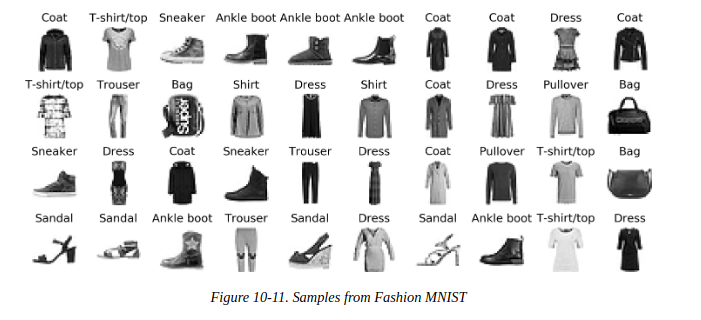

In [2]:
fashion_mnist_ds = keras.datasets.fashion_mnist
#Separating training set and test set
(X_train_full, Y_train_full),(X_test_set, Y_test_set) = \
                                        fashion_mnist_ds.load_data()

In [3]:
print("type of X_train_full: ", type(X_train_full))
#60,000 instances of 28x28 pixels. Each pixel is rep by int between
#0 and 255
print("X_train_full shape: ",X_train_full.shape)

type of X_train_full:  <class 'numpy.ndarray'>
X_train_full shape:  (60000, 28, 28)


##### Creating a validation set and also scaling data so value lies between 0 an 1, also take care of converting data type to float

In [4]:
X_validtn, Y_validtn = X_train_full[:5000]/255.0, Y_train_full[:5000]
X_train, Y_train = X_train_full[5000:]/255.0, Y_train_full[5000:]
X_test_set = X_test_set/255.0

#Adding class labels
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Creating ANN using sequential API:
- We use two hidden layers.

In [5]:
seq_model = keras.models.Sequential()
#Defining the input layer: Flatten to get 1D array. We can also intially define
#this layer without a shape. This command can also be replaced with 
#keras.kayers.InputLayer(input_shape=[28,28])
seq_model.add(keras.layers.Flatten(input_shape=[28,28]))
#Adding two hidden layers with 300 and 100 neurons and  relu activation 
seq_model.add(keras.layers.Dense(300, activation='relu'))
seq_model.add(keras.layers.Dense(100, activation='relu'))
#Adding the final output layer
seq_model.add(keras.layers.Dense(10, activation="softmax"))

Note the construction of the layers above can be done by passing 
them to the constructor of models.Sequential() like:  
`seq_model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])     `  

#### Getting summary of the model

In [6]:
seq_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


#### Getting list of layers and accessing each layer

In [7]:
print("model layer info:\n",seq_model.layers)

hidden_lay_2 = seq_model.layers[2]
print("hidden layer 2 name: ",hidden_lay_2.name)

model layer info:
 [<tensorflow.python.keras.layers.core.Flatten object at 0x7f10a0541dc0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f103df88430>, <tensorflow.python.keras.layers.core.Dense object at 0x7f10a0534970>, <tensorflow.python.keras.layers.core.Dense object at 0x7f103b252c10>]
hidden layer 2 name:  dense_1


#### Accessing and changing parameters of the layers. 
This can be done using `get_weights()` and `set_weights()`.   
Hidden layers have both connection weights and biases(per neuron in the layer)
as layer parameters

In [8]:
weights, biases = hidden_lay_2.get_weights()
print("weight shape: ",weights.shape)
print("bias values:\n",biases)

weight shape:  (300, 100)
bias values:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


## Compiling model 

In [9]:
seq_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="sgd", metrics="accuracy")

# Note that Using loss="sparse_categorical_crossentropy" is 
# equivalent to using loss=keras.losses.sparse_categorical_crossentropy.
# Similarly, specifying optimizer="sgd" is equivalent to specifying 
# optimizer=keras.optimizers.SGD(), and metrics=["accuracy"] is 
# equivalent to metrics=[keras.metrics.sparse_categorical_accuracy]. 

#### Useful information on compiling
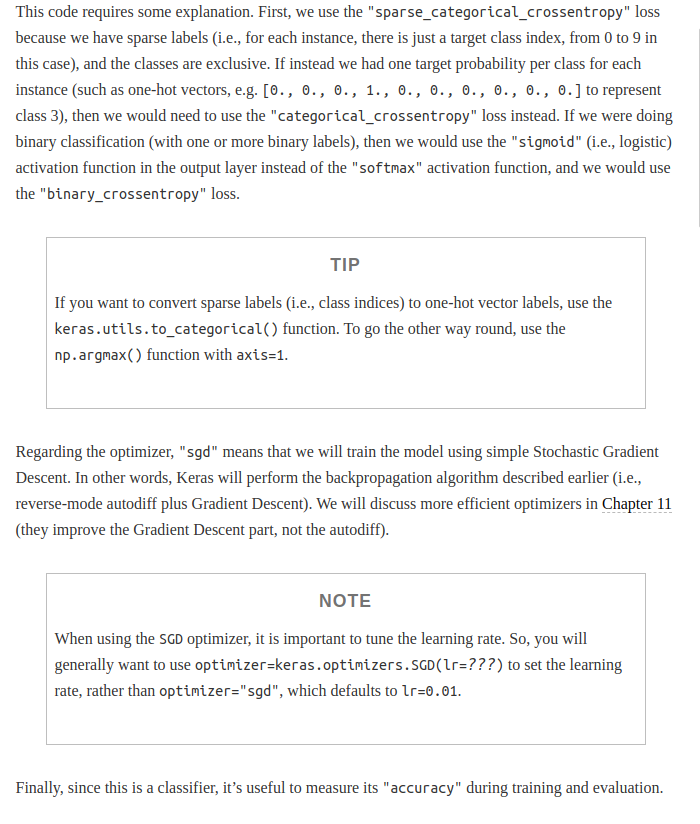

## Training and evaluating the NN

### Training the model using `fit()` method

In [10]:
training_history = seq_model.fit(X_train, Y_train, epochs=30,
                                validation_data=(X_validtn,Y_validtn))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.7299 - accuracy: 0.7564 - val_loss: 0.5044 - val_accuracy: 0.8350
Epoch 2/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4933 - accuracy: 0.8284 - val_loss: 0.4488 - val_accuracy: 0.8496
Epoch 3/30
1719/1719 [==============================] - 18s 11ms/step - loss: 0.4494 - accuracy: 0.8428 - val_loss: 0.4213 - val_accuracy: 0.8562
Epoch 4/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4212 - accuracy: 0.8527 - val_loss: 0.4048 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4010 - accuracy: 0.8595 - val_loss: 0.4011 - val_accuracy: 0.8612
Epoch 6/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3842 - accuracy: 0.8655 - val_loss: 0.4016 - val_accuracy: 0.8644
Epoch 7/30
1719/1719 [==============================] - 19s 11ms/step - loss: 0.3698 - accuracy: 0.8703 - val_loss: 0.3711 - 

In [19]:
#Continue training for two more epochs:
#NOte that batch_size=32 argument fix the number of instances taken per batch in the epoch.
#Default is 32. That is why we have 55000/32 ~ 1719 grad evalutio per iter in every epoch
training_history_2 = seq_model.fit(X_train,Y_train, epochs=2, batch_size=32,
                                    validation_data=(X_validtn,Y_validtn))


1719/1719 [==============================] - 19s 11ms/step - loss: 0.2722 - accuracy: 0.8997 - val_loss: 0.3004 - val_accuracy: 0.8928


### Tips on interpreting the training output and automatic splitting to get val set 
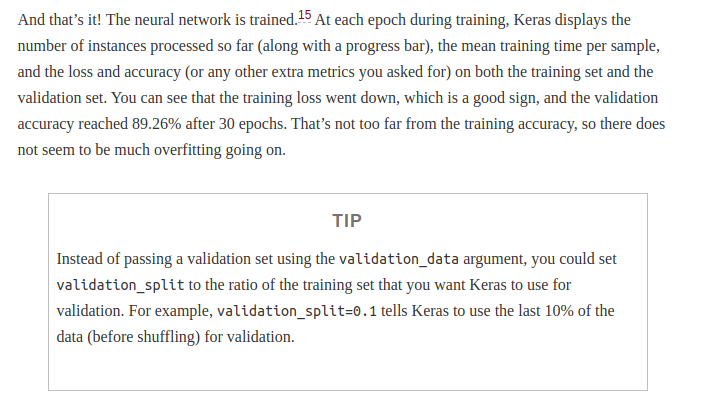

### Giving custom weights:
- Customs weightage can be given to different features and instances of data set if the dataset is skewed
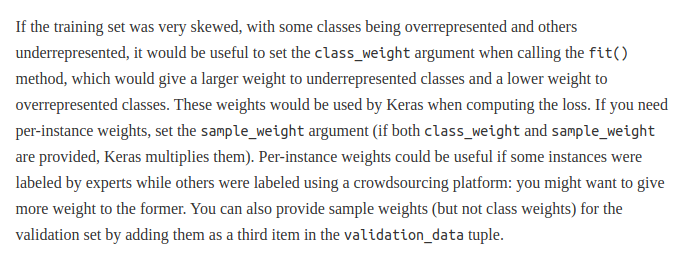


### Using training_history to understand trends in training and exporting training_history to Panda  for visualization
`training_history.params` gives training parameters.  
`training_history.epoch` is also useful.   
`training_history.training_history` gives a dictioanary which can be loaded as panda data frame.

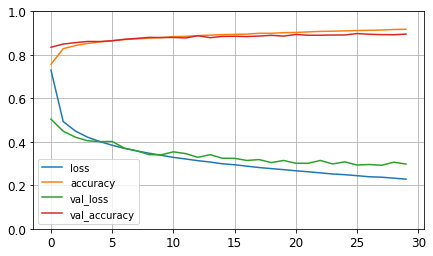

In [28]:
#loading history.history dict as a panda df
history_df = pd.DataFrame(training_history.history)
history_df.plot(figsize=(7,4))
plt.grid(True)
plt.ylim((0,1))
plt.show()

### Next hyperparameter tuning and finally evaluate the model on test set

In [30]:
#model evaluation on test set
seq_model.evaluate(X_test_set,Y_test_set)

313/313 [==============================] - 2s 8ms/step - loss: 0.3428 - accuracy: 0.8775


[0.3427523672580719, 0.8774999976158142]

## Making predictions

In [42]:
X_some_test = X_test_set[3:5]
Y_some_test = Y_test_set[3:5]
#Gives probability with respect to each class
y_probabilities = seq_model.predict(X_some_test)
print("predicted label probabilities: \n",y_probabilities.round(2))
#Predicting class itself
y_class_pred = seq_model.predict_classes(X_some_test)
print("predicted label class: ",np.array(class_labels)[y_class_pred])
print("original label: ",np.array(class_labels)[Y_some_test])


predicted label probabilities: 
 [[0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.12 0.   0.01 0.   0.01 0.   0.87 0.   0.   0.  ]]
predicted label class:  ['Trouser' 'Shirt']
original label:  ['Trouser' 'Shirt']


## Saving model
Works for sequential and functional API

In [43]:
os.makedirs("./saved_models",exist_ok=True)
seq_model.save("./saved_models/seq_image_classfr.h5")

## Loading model

In [44]:
my_model_loaded = keras.models.load_model("./saved_models/seq_image_classfr.h5")